In [253]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [254]:
data = []

In [296]:
n_n = 2
timescale = 1500

p_space = np.zeros((n_n,timescale))
sim_space = np.zeros((n_n,timescale))
p_state = np.random.uniform(size=n_n)

Ex = np.zeros((n_n,n_n))
Ex[1,0]=1
np.fill_diagonal(Ex,0)
In = np.zeros((n_n,n_n))
In[0,1]=0
np.fill_diagonal(In,0)

ec = 0.5
ic = 0.5

decay = 0.95

I_ext = np.zeros((n_n,timescale))
I_ext[0,500:1000] = 0.1

def fire_state(vec):
    temp = np.zeros(vec.shape[0])
    for i,v in enumerate(vec):
        temp[i] = np.random.choice([0,1],p=[1-v,v])
    return temp

def H(p,I,b=1.5):
    return np.clip(np.exp(b*I)*p+(np.exp(b*I)-1)/(np.exp(b)-1),0,1)

p_space[:,0]=p_state

for i in range(1,timescale):
    f_state = fire_state(p_state)
    I_syn = ec*(np.matmul(Ex,f_state)/n_n) - ic*(np.matmul(In,f_state)/n_n)
    p_state = H(decay*(1-f_state)*(p_state)+(1-decay)*0.0*np.ones(n_n),I_syn+I_ext[:,i])
    sim_space[:,i]= f_state
    p_space[:,i] = p_state

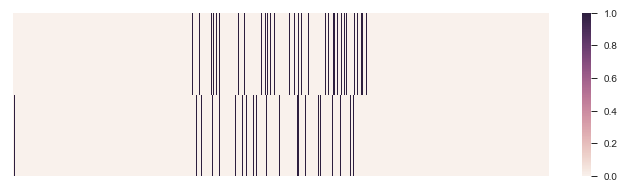

In [297]:
plt.figure(figsize=(12,3))
sns.heatmap(sim_space,xticklabels=[],yticklabels=[])

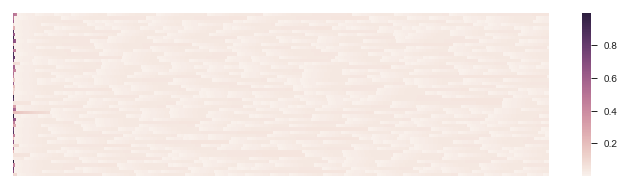

In [290]:
plt.figure(figsize=(12,3))
sns.heatmap(p_space,xticklabels=[],yticklabels=[])

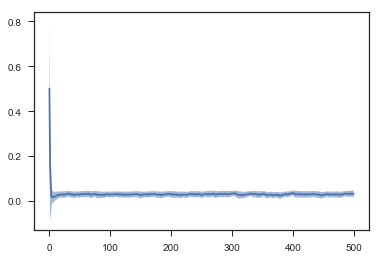

In [292]:
p_mean = p_space.mean(axis=0)
p_sd = p_space.std(axis=0)
plt.plot(np.arange(timescale),p_mean)
plt.fill_between(np.arange(timescale),p_mean-p_sd,p_mean+p_sd,alpha=0.5)

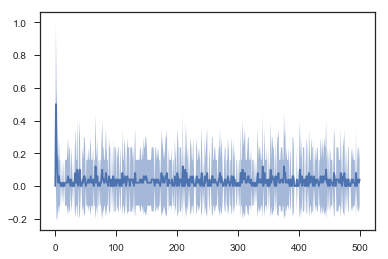

In [293]:
f_mean = sim_space.mean(axis=0)
f_sd = sim_space.std(axis=0)
plt.plot(np.arange(timescale),f_mean)
plt.fill_between(np.arange(timescale),f_mean-f_sd,f_mean+f_sd,alpha=0.5)

In [184]:
data.append(dict(decay=decay,n=n_n,p_mean=p_mean,p_sd=p_sd,f_mean=f_mean,f_sd=f_sd))

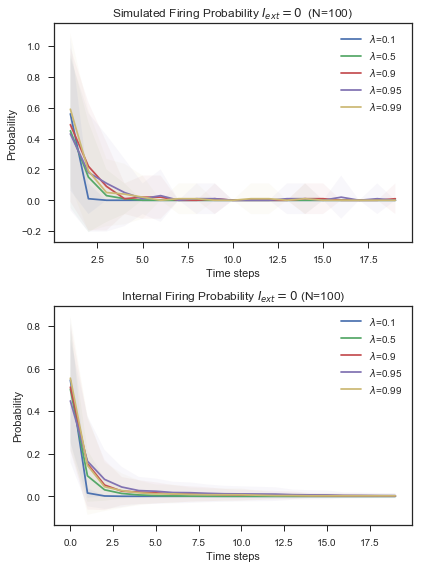

In [185]:
plt.figure(figsize=(6,8))
sns.set_style('ticks')
for d in data:
    plt.subplot(211)
    plt.title(r"Simulated Firing Probability $I_{ext} = 0$  (N=100)")
    plt.ylabel("Probability")
    plt.xlabel("Time steps")
    plt.plot(np.arange(1,20),d["f_mean"][1:20],label=r"$\lambda$="+str(d["decay"]))
    plt.fill_between(np.arange(1,20),(d["f_mean"]-d["f_sd"])[1:20],(d["f_mean"]+d["f_sd"])[1:20],alpha=0.05)
    plt.legend()
    plt.subplot(212)
    plt.title("Internal Firing Probability $I_{ext} = 0$ (N=100)")
    plt.ylabel("Probability")
    plt.xlabel("Time steps")
    plt.plot(np.arange(20),d["p_mean"][:20],label=r"$\lambda$="+str(d["decay"]))
    plt.fill_between(np.arange(20),(d["p_mean"]-d["p_sd"])[:20],(d["p_mean"]+d["p_sd"])[:20],alpha=0.05)
    plt.legend()
plt.tight_layout()
plt.savefig("Results I_ext_0.png",dpi=300)

In [144]:
data.append(dict(i=I_ext[501],n=n_n,p_mean=p_mean,p_sd=p_sd,f_mean=f_mean,f_sd=f_sd))

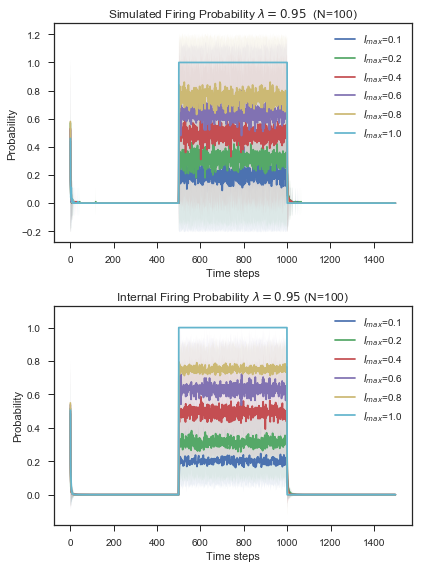

In [146]:
plt.figure(figsize=(6,8))
sns.set_style('ticks')
for d in data:
    plt.subplot(211)
    plt.title(r"Simulated Firing Probability $\lambda = 0.95$  (N=100)")
    plt.ylabel("Probability")
    plt.xlabel("Time steps")
    plt.plot(np.arange(1,timescale),d["f_mean"][1:],label=r"$I_{max}$="+str(d["i"]))
    plt.fill_between(np.arange(1,timescale),(d["f_mean"]-d["f_sd"])[1:],(d["f_mean"]+d["f_sd"])[1:],alpha=0.1)
    plt.legend()
    plt.subplot(212)
    plt.title("Internal Firing Probability $\lambda = 0.95$ (N=100)")
    plt.ylabel("Probability")
    plt.xlabel("Time steps")
    plt.plot(np.arange(timescale),d["p_mean"],label=r"$I_{max}$="+str(d["i"]))
    plt.fill_between(np.arange(timescale),(d["p_mean"]-d["p_sd"]),(d["p_mean"]+d["p_sd"]),alpha=0.1)
    plt.legend()
plt.tight_layout()
plt.savefig("Results Changing I_ext.png",dpi=300)